# RNN(Recurrent Neural Network)

## `keras로 RNN 구현`

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

In [4]:
model = Sequential()

# hidden_units = 3 (메모리 셀이 다음 시점의 메모리 셀과 출력층으로 보내는 값의 크기)
# input_shape = (timesteps, input_dim)  timesteps : 입력 시퀀스의 길이, 시점의 수 / input_dim : 입력의 크기
model.add(SimpleRNN(3, input_shape=(2,10)))  
#model.add(SimpleRNN(3, input_length=2, input_dim=10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


    -> 출력값(batch_size, output_dim) 크기의 2D tensor 일때, output_dim은 hidden_units의 값 3

In [5]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


    -> batch_size 8로 기재, 출력의 크기 (8,3)

In [7]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


    -> batch_size, timesteps, output_dim 크기의 3D tensor

## `Python의 Numpy로 RNN 구현`

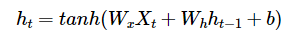

In [8]:
import numpy as np

In [20]:
timesteps, input_dim, hidden_units= 10, 4,8

# input 2d tensor
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉상태 0 vector

hidden_state_t = np.zeros((hidden_units))

print(f"초기 은닉 상태 -> {hidden_state_t}")

Wx = np.random.random((hidden_units, input_dim))   # (8,4) 크기의 2d tensor, input에 대한 weight
Wh = np.random.random((hidden_units, hidden_units)) # (8,8) 크기의 2d tensor, hidden state에 대한 weight
b = np.random.random((hidden_units, )) #(8,) 크기의 1d tensor, bias

print(f" 가중치 Wx -> {np.shape(Wx)}")
print(f" 가중치 Wh -> {np.shape(Wh)}")
print(f" 편향 b -> {np.shape(b)}")


total_hidden_states = []

# 각 timesteps 간 input

for input_t in inputs:
    
    # Wx * Xt + Wh * Ht-1 + b
    output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t)+b)
    
    # 각 시점 t별 메모리 셀의 출력의 크기 (timestep t, ouput_dim)
    # 각 시점의 은닉 상태를 계속해서 누적
    total_hidden_states.append(list(output_t))
    hidden_state_t = output_t
    
# 출력 시 값을 깔끔하게 함
total_hidden_states= np.stack(total_hidden_states, axis=0)


#모든 시점의 은닉상태
print(f" 모든 시점의 hidden states = \n {total_hidden_states}")
    

초기 은닉 상태 -> [0. 0. 0. 0. 0. 0. 0. 0.]
 가중치 Wx -> (8, 4)
 가중치 Wh -> (8, 8)
 편향 b -> (8,)
 모든 시점의 hidden states = 
 [[0.72142611 0.89115199 0.68385193 0.84210824 0.93933851 0.85704589
  0.90456349 0.78545465]
 [0.99997748 0.99998437 0.99956839 0.9997046  0.99991349 0.99994163
  0.99991812 0.99998583]
 [0.99999249 0.99999042 0.99989187 0.99994518 0.99990426 0.99998244
  0.99990207 0.99998696]
 [0.99999889 0.99999859 0.99997727 0.99997844 0.99999251 0.99999718
  0.9999895  0.99999836]
 [0.99999763 0.9999957  0.9999407  0.99994209 0.99997428 0.99999399
  0.99997107 0.99999671]
 [0.99999375 0.99999067 0.99982084 0.99982916 0.99993968 0.99998611
  0.99995133 0.99999554]
 [0.99999835 0.99999496 0.99995066 0.99993855 0.99997083 0.99999505
  0.99996443 0.99999665]
 [0.99999378 0.99999411 0.99989996 0.99990501 0.99993317 0.99997949
  0.99994141 0.99999461]
 [0.99999759 0.99999434 0.99993618 0.99987291 0.99994622 0.99998843
  0.99994714 0.9999969 ]
 [0.99999869 0.99999805 0.99997408 0.99995694 0.9

# Q.

    단어 집합(Vocabulary)의 크기가 5,000이고 임베딩 벡터의 차원은 100이다.
    은닉층에서는 Simple RNN으로 은닉 상태의 크기는 128이고, 은닉층은 1개이다.
    훈련에 사용하는 모든 샘플의 길이는 30으로 가정할 때, 
    이진 분류를 수행하는 모델로, 출력층의 뉴런은 1개로 시그모이드 함수를 사용할때의 RNN 모델 구현 및 parameter 개수?


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense

In [27]:
vocab_size = 5000
embedding_dim = 100
hidden_size =128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_size))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 128)               29312     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 529,441
Trainable params: 529,441
Non-trainable params: 0
_________________________________________________________________
